In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_folder_path = 'data'
GDP_FILE = 'monthlygdpto4dp.xlsx'
sheet_name = 'Data_table'
skip_rows = 2

# Read the Excel file into a DataFrame
df = pd.read_excel(os.path.join(data_folder_path, GDP_FILE), sheet_name = sheet_name, skiprows=skip_rows - 1, header=skip_rows)
# Set the first column as the index
df.set_index(df.columns[0], inplace=True)
df.rename(columns={'Construction (F) [note1],[note 2]': 'Construction (F)'}, inplace=True)
df.index = pd.to_datetime(df.index, format='%Y%b')
df.index.name = 'Date'

df.head()

,Monthly GDP (A-T),Agriculture (A),Construction (F),Production (B-E),Services (G-T)
Date,,,,,
1997-01-01,63.3398,51.9196,88.6822,81.8493,58.9698
1997-02-01,63.9959,52.5957,89.3841,82.0903,59.7182
1997-03-01,64.0355,53.2952,90.3395,80.8967,59.9700
1997-04-01,64.6273,54.6361,92.6826,82.9387,60.1678
1997-05-01,64.1371,55.2798,93.1397,82.5730,59.5863


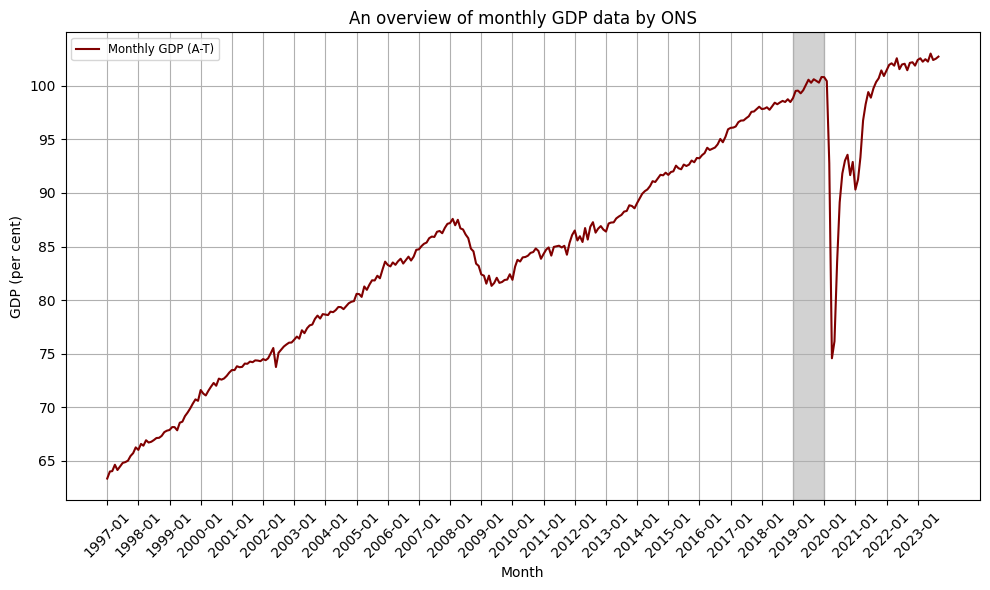

In [3]:
plt.figure(figsize=(10, 6))

for column in df.columns:
  if column == 'Monthly GDP (A-T)':
    plt.plot(df.index, df[column], label=column, color = 'maroon')
    break

plt.title('An overview of monthly GDP data by ONS')
plt.xlabel('Month')
plt.ylabel('GDP (per cent)')
plt.legend(loc='best',fontsize = 'small')
plt.grid()
plt.xticks(df.index[::12], [dt.strftime('%Y-%m') for dt in df.index[::12]], rotation=45)
plt.tight_layout()  

# Highlight the period from 2019-01 to 2020-01 with a grey background
plt.axvspan(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-01-01'), alpha=0.35, color='grey')
plt.show()

#1f77b4
slateblue
#ff7f0e
#2ca02c


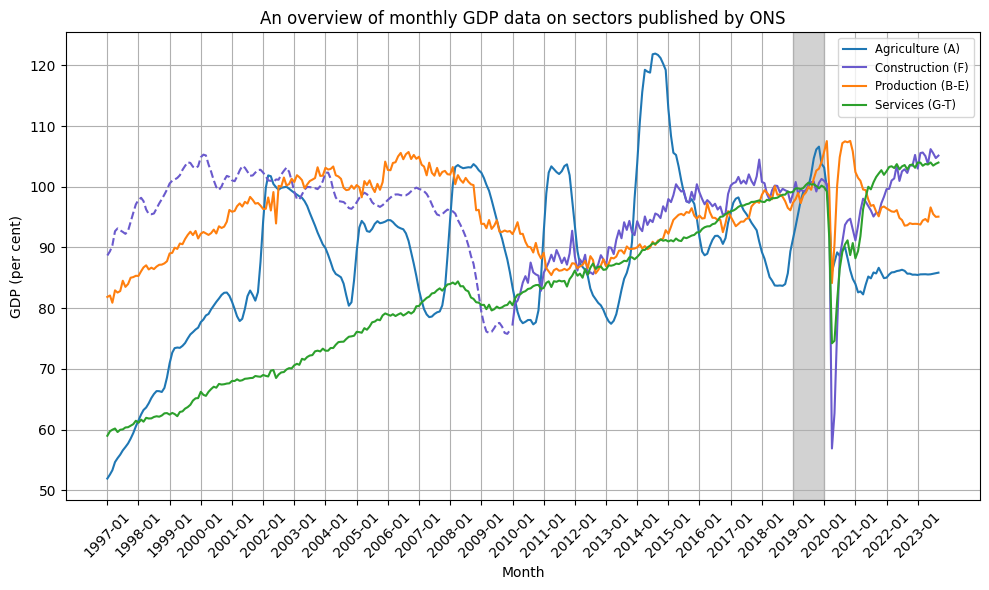

In [4]:
# use dashed line for the period before 2010 for Construction (F) and solid line for the period after 2010

plt.figure(figsize=(10, 6))

for column in df.columns:
  if column == 'Monthly GDP (A-T)':
    continue
  if column == 'Construction (F)':
        line, = plt.plot(df.index[df.index.year < 2010], df[column][df.index.year < 2010], linestyle= 'dashed', color = 'slateblue')
        plt.plot(df.index[df.index.year >= 2010], df[column][df.index.year >= 2010], label=column, linestyle= 'solid', color = 'slateblue')
  else:
    line, = plt.plot(df.index, df[column], label=column)
  print(line.get_color())

plt.title('An overview of monthly GDP data on sectors published by ONS')
plt.xlabel('Month')
plt.ylabel('GDP (per cent)')
plt.legend(loc='best',fontsize = 'small')
plt.grid()
plt.xticks(df.index[::12], [dt.strftime('%Y-%m') for dt in df.index[::12]], rotation=45)
plt.tight_layout() 

plt.axvspan(pd.Timestamp('2019-01-01'), pd.Timestamp('2020-01-01'), alpha=0.35, color='grey')
plt.show()

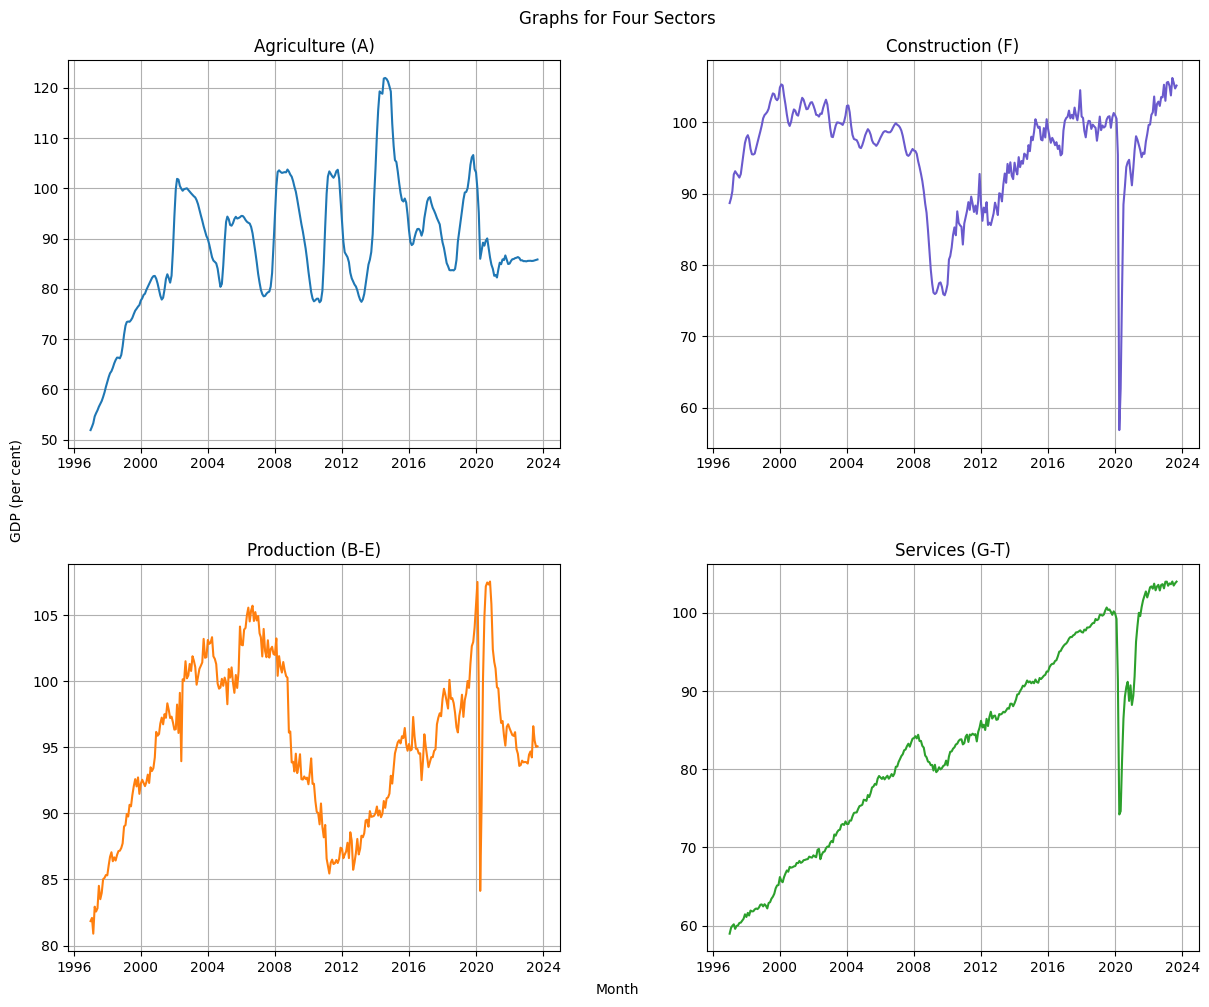

In [5]:
# To ensure the color for each sector is consistent across all graphs, we can define a list of colors and use it to plot each sector on a separate subplot
colors = ['#1f77b4', 'slateblue', '#ff7f0e', '#2ca02c']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs = axs.flatten()

# Iterate through each column and plot it on a separate subplot
for i, column in enumerate(df.columns[1:]):
    axs[i].plot(df.index, df[column], label=column, color = colors[i] )

    axs[i].set_title(column)
    axs[i].grid(True)

# Set labels, title, and legend for the entire figure
fig.suptitle('Graphs for Four Sectors')
fig.text(0.5,0, 'Month', ha='center', va='center')
fig.text(0, 0.5, 'GDP (per cent)', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

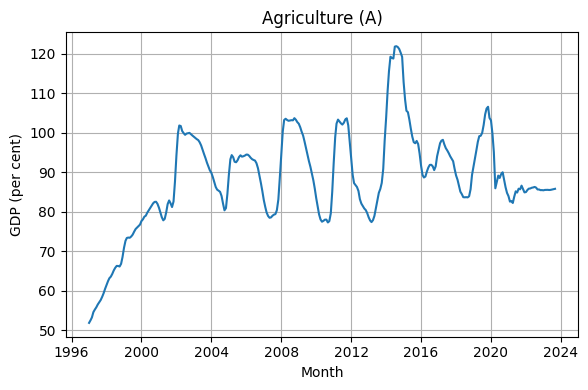

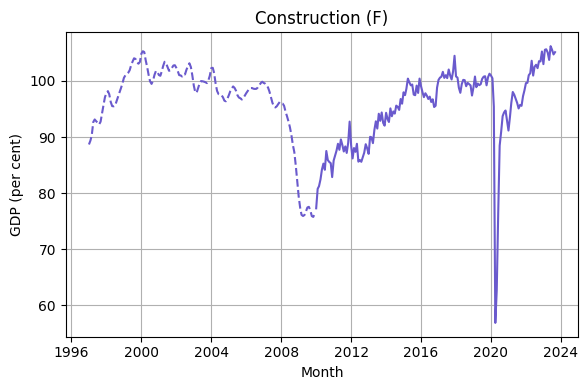

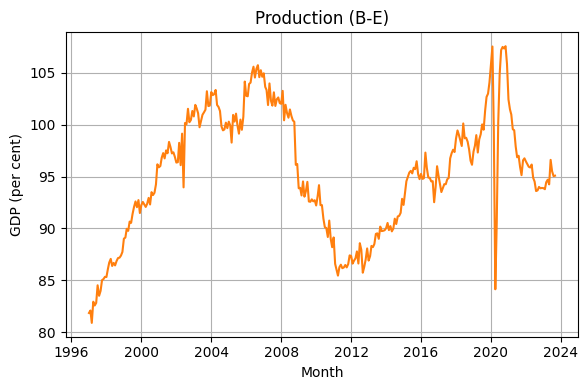

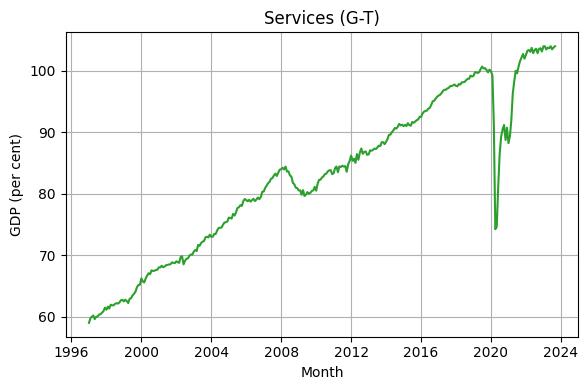

In [6]:
# Plot all columns separately on a single figure
for i, column in enumerate(df.columns[1:]):
  plt.figure(figsize=(6,4))
  if i == 1:
    plt.plot(df.index[df.index.year < 2010], df[column][df.index.year < 2010], linestyle= 'dashed', color = 'slateblue')
    plt.plot(df.index[df.index.year >= 2010], df[column][df.index.year >= 2010], label=column, linestyle= 'solid', color = 'slateblue')
  else:
    plt.plot(df.index, df[column], label=column, color = colors[i])

  plt.title(column)
  plt.xlabel('Month')
  plt.ylabel('GDP (per cent)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [7]:
GVA_FILE = 'gdplowlevelaggregates2023q3.xlsx'
skip_rows = 3

# Read the Excel file into a DataFrame
df_gva = pd.read_excel(os.path.join(data_folder_path, GVA_FILE ),sheet_name = '4',  skiprows=skip_rows - 1, header=skip_rows)
df_gva.set_index(df_gva.columns[0], inplace=True)
df_gva.head()

,L4PP,L4NM,KZO4,KZO5,KZO6,L4NR,L4OQ,L4NP,KZO7,KZO8,...,L4ND,L4NF,L4NG,L4NH,L4PN,L4NI,L4NJ,L4NK,L4PO,L4NL
Dataset identifier code,,,,,,,,,,,,,,,,,,,,,
1997,1000,10.3597,9.6520,0.2924,0.4154,261.3683,212.9981,19.8980,0.7762,15.1480,...,3.5051,1.0431,3.2475,3.9541,14.5157,4.1281,1.2182,9.1693,1.6522,1.6522
1998,1000,10.3880,9.7145,0.2901,0.3834,254.9670,203.0983,14.8501,0.5468,11.3949,...,3.2585,1.1703,2.6695,3.8209,14.6290,4.1276,1.4359,9.0654,1.6126,1.6126
1999,1000,9.4084,8.7194,0.2713,0.4177,251.5443,195.9196,15.5578,0.5138,12.6204,...,3.4042,1.2156,2.6448,3.9939,14.1286,3.7151,1.3769,9.0367,1.6685,1.6685
2000,1000,9.1381,8.5173,0.2501,0.3706,252.1724,194.5429,21.4609,0.3210,18.7055,...,3.7458,1.3093,2.1509,4.1842,14.4200,3.7296,1.3630,9.3275,1.9119,1.9119
2001,1000,8.4442,7.7440,0.2657,0.4345,241.3693,182.5370,20.0229,0.2832,17.4956,...,3.4118,1.3131,2.3489,4.6047,14.5192,3.7212,1.2773,9.5207,1.8873,1.8873


In [8]:
# a tool to locate the column index of a given code
def locate_code(code):
  cols = list(df_gva.columns)
  return cols.index(code)

locate_code('L4NL')

176

In [9]:
# use the tool to locate the column index of the code for each sector
sector_range = {
    'Agriculture (A)' : [1,4],
    'Construction (F)': [86,89],
    'Production (B-E)': [6,85],
    'Services (G-T)': [90,176]
}

In [10]:
def pearson(X,Y):
  # Calculate Pearson correlation coefficient
  correlation_matrix = np.corrcoef(X, Y)
  pearson_corr = correlation_matrix[0, 1]
  return pearson_corr

def mse(y1, y2):
    return np.mean((y1 - y2)**2)

In [11]:
# Calculate the Pearson correlation coefficient between the main sector and each sub-sector to find the most relevant sub-sector
pearson_dict = {}
best_dict ={}

for sector,scale in sector_range.items():
  sector_sum = scale[0]
  sector_part = scale[1]
  x_tmp = df_gva[df_gva.columns[sector_sum]]
  min_mse = None
  best = []
  p_dict_tmp = {}

  for i in range(sector_sum+1, sector_part+1):
    y_tmp = df_gva[df_gva.columns[i]]
    p_tmp = pearson(x_tmp,y_tmp)
    mse_tmp = mse(x_tmp,y_tmp)

    if min_mse == None or mse_tmp < min_mse:
      min_mse = mse_tmp
      best = [i, mse_tmp, p_tmp]

    p_dict_tmp.update({df_gva.columns[i] : [p_tmp, mse_tmp]})

  pearson_dict.update({sector : p_dict_tmp})
  best_dict.update({sector : best})

  print(sector ,': most revelant sub-sector code = {}, min MSE = {:.4f} , pearson = {:.4f}'.format(df_gva.columns[best[0]], best[1], best[2]))

Agriculture (A) : most revelant sub-sector code = KZO4, min MSE = 0.5526 , pearson = 0.9961
Construction (F) : most revelant sub-sector code = KZX3, min MSE = 1053.9786 , pearson = 0.8638
Production (B-E) : most revelant sub-sector code = L4NT, min MSE = 1815.4573 , pearson = 0.9822
Services (G-T) : most revelant sub-sector code = L4PD, min MSE = 355595.3254 , pearson = 0.8946


d:\WORK\Anconda\envs\ucl\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
d:\WORK\Anconda\envs\ucl\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


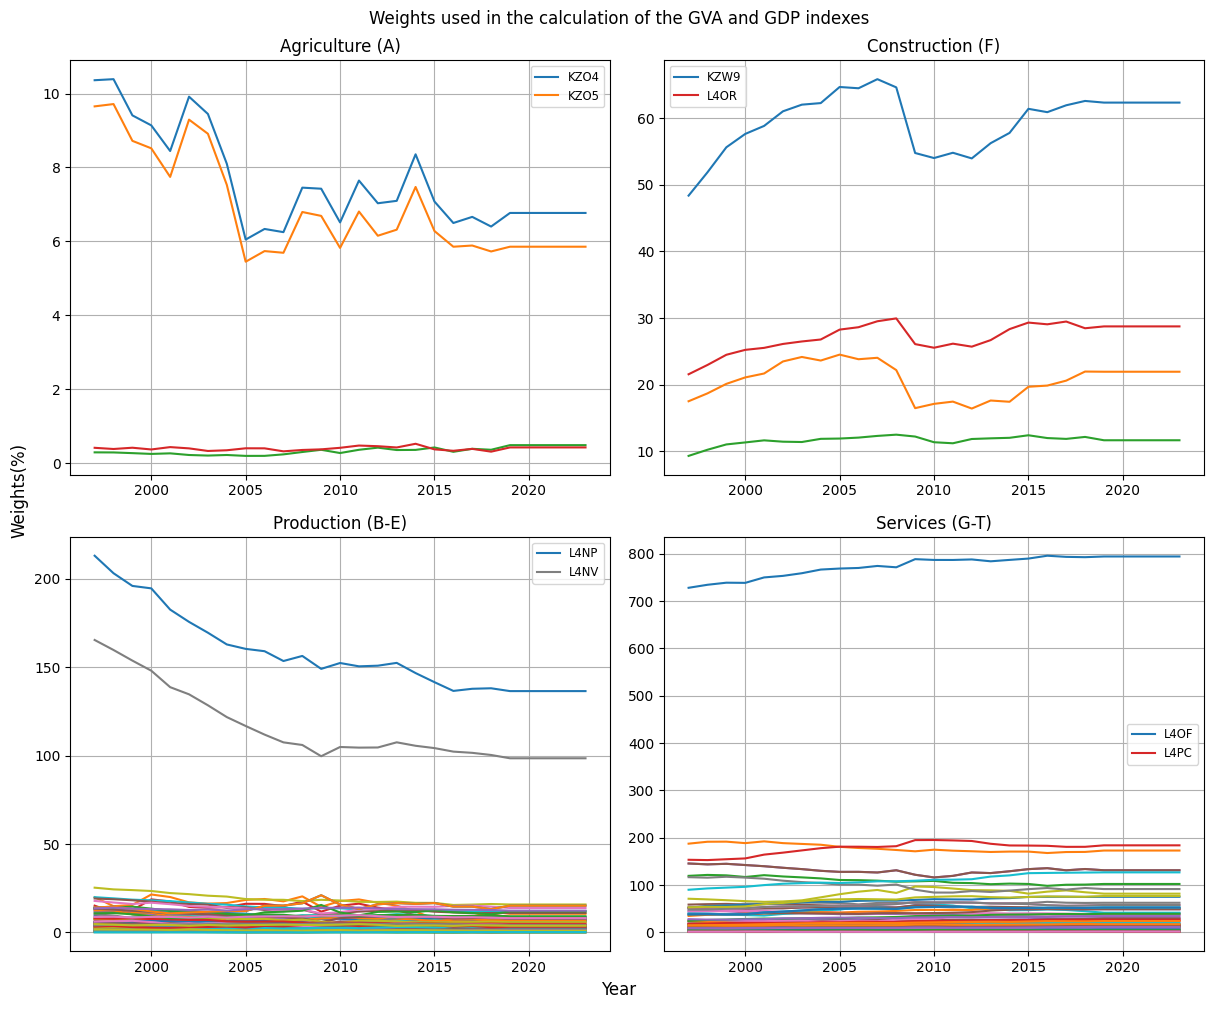

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs = axs.flatten()

for i, sectors in enumerate(sector_range.items()):
    sector = sectors[0]
    scale = sectors[1]
    for j in range(scale[0], scale[1]+1):
        column = df_gva.columns[j]
        if j  == scale[0]:
            axs[i].plot(df_gva.index, df_gva[column], label = df_gva.columns[j+1])
        elif j == best_dict[sector][0]:
            axs[i].plot(df_gva.index, df_gva[column], label = df_gva.columns[j+1])
        else:
            axs[i].plot(df_gva.index, df_gva[column])

    axs[i].set_title(sector)
    axs[i].legend(loc='best',fontsize = 'small')
    axs[i].grid(True)

# Set labels, title, and legend for the entire figure
fig.suptitle('Weights used in the calculation of the GVA and GDP indexes', fontsize = 'large')
fig.text(0.5,0, 'Year', ha='center', va='center', fontsize = 'large')
fig.text(0, 0.5, 'Weights(%)', ha='center', va='center', rotation='vertical', fontsize = 'large')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.1)
plt.show()